# SHETH L.U.J. & SIR M.V. COLLEGE

**Rajanish bhardwaj | T073**

Practical No. 9

Aim :- Principal Component Analysis (PCA)



*   Perform PCA on a dataset to reduce dimensionality.
*   Evaluate the explained variance and select the appropriate number of principalcomponents.
*   Visualize the data in the reduced-dimensional space.


9.1 Reducing Features Using Principal Components


In [ ]:
# Load libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the data
df = pd.read_csv("OnlineNewsPopularity.csv")

# Remove extra spaces in column names
df.columns = df.columns.str.strip()

# Remove non-numeric and target columns
df_clean = df.drop(columns=['url', 'shares'])

# Convert to numeric (just in case)
df_clean = df_clean.apply(pd.to_numeric, errors='coerce')

# Standardize the feature matrix
X = StandardScaler().fit_transform(df_clean)

# PCA for 95% variance
pca = PCA(n_components=0.95, whiten=True)
X_pca = pca.fit_transform(X)

print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_pca.shape[1])


Original number of features: 59
Reduced number of features: 37


9.2 Reducing Features When Data Is Linearly Inseparable


Before preprocessing (rows,cols): (39644, 61)
After preprocessing  (rows,cols): (39644, 59)

StandardScaler Parameters:
{'copy': True, 'with_mean': True, 'with_std': True}

Initial PCA Parameters:
{'copy': True, 'iterated_power': 'auto', 'n_components': None, 'n_oversamples': 10, 'power_iteration_normalizer': 'auto', 'random_state': None, 'svd_solver': 'auto', 'tol': 0.0, 'whiten': False}

Number of principal components to explain 95% variance: 37

Final PCA Parameters (with selected n_components):
{'copy': True, 'iterated_power': 'auto', 'n_components': 37, 'n_oversamples': 10, 'power_iteration_normalizer': 'auto', 'random_state': None, 'svd_solver': 'auto', 'tol': 0.0, 'whiten': False}

Shape before PCA (rows,features): (39644, 59)
Shape after  PCA (rows,components): (39644, 37)

Cumulative variance (checkpoints):
 PC1..PC1: 0.0828
 PC1..PC2: 0.1526
 PC1..PC5: 0.3122
 PC1..PC10: 0.5095
 PC1..PC37: 0.9552
 PC1..PC59: 1.0000


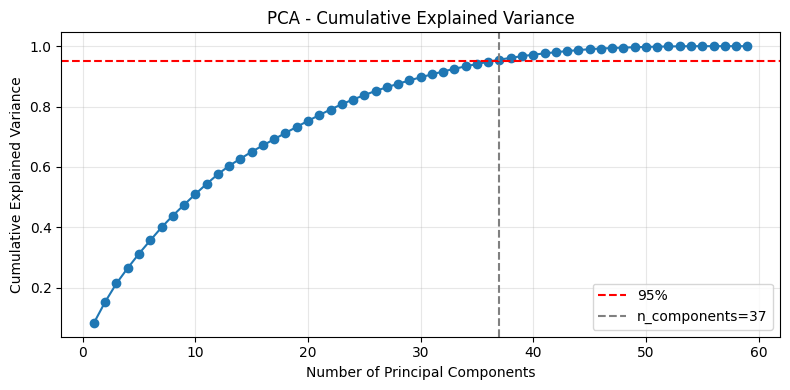


Data file used: OnlineNewsPopularity.csv


In [ ]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# load dataset
fp="OnlineNewsPopularity.csv"
df=pd.read_csv(fp); df.columns=df.columns.str.strip()

# initial shape
r0,c0=df.shape

# prepare numeric features: drop url and shares if present
drop=[]
if 'url' in df.columns: drop.append('url')
if 'shares' in df.columns: drop.append('shares')
X_df=df.drop(columns=drop) if drop else df.copy()

# coerce numeric and fill medians
X_df=X_df.apply(pd.to_numeric,errors='coerce')
X_df=X_df.fillna(X_df.median())
r1,c1=X_df.shape

# before/after
print("Before preprocessing (rows,cols):", (r0,c0))
print("After preprocessing  (rows,cols):", (r1,c1))

# scaler params
scaler=StandardScaler()
print("\nStandardScaler Parameters:"); print(scaler.get_params())

# initial PCA params
pca_init=PCA()
print("\nInitial PCA Parameters:"); print(pca_init.get_params())

# scale data and fit PCA to get variance
X_scaled=scaler.fit_transform(X_df.values)
pca_var=PCA(); pca_var.fit(X_scaled)
explained=pca_var.explained_variance_ratio_; cum=np.cumsum(explained)

# components needed for 95%
thr=0.95
n_req=int(np.searchsorted(cum,thr)+1)
print(f"\nNumber of principal components to explain {int(thr*100)}% variance:", n_req)

# final PCA
pca_final=PCA(n_components=n_req,whiten=False)
X_pca=pca_final.fit_transform(X_scaled)
print("\nFinal PCA Parameters (with selected n_components):"); print(pca_final.get_params())

# shapes
print("\nShape before PCA (rows,features):", X_scaled.shape)
print("Shape after  PCA (rows,components):", X_pca.shape)

# checkpoints
check=[1,2,5,10,n_req,len(cum)]
print("\nCumulative variance (checkpoints):")
for k in sorted(set([x for x in check if x<=len(cum)])):
    print(f" PC1..PC{k}: {cum[k-1]:.4f}")

# plot
plt.figure(figsize=(8,4))
plt.plot(np.arange(1,len(cum)+1),cum,marker='o')
plt.axhline(thr,color='red',linestyle='--',label=f'{int(thr*100)}%')
plt.axvline(n_req,color='gray',linestyle='--',label=f'n_components={n_req}')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Cumulative Explained Variance')
plt.grid(alpha=0.3); plt.legend(); plt.tight_layout()
plt.show()

print("\nData file used:", fp)


9.3 Reducing Features by Maximizing Class Separability


Original features: 59
Reduced features: 1
Explained variance ratio: [1.]


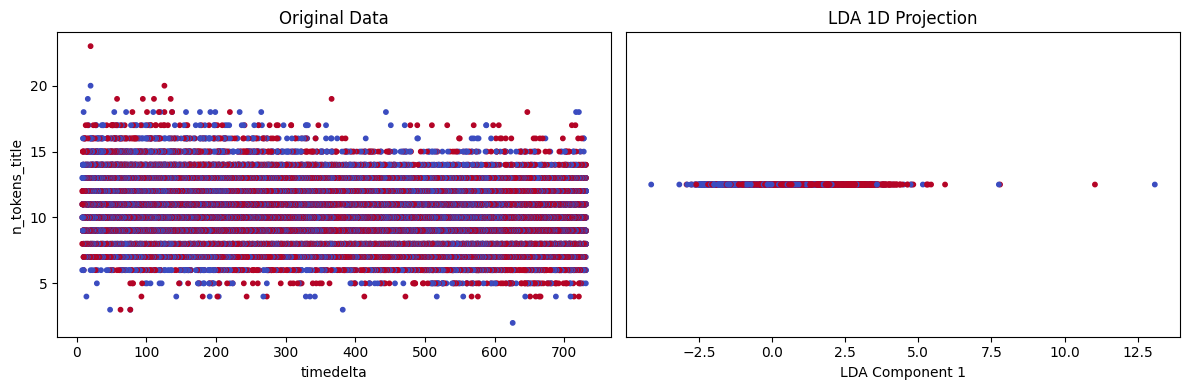

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

df = pd.read_csv("OnlineNewsPopularity.csv")
df.columns = df.columns.str.strip()

# Prepare features and target
y = (df["shares"] > df["shares"].median()).astype(int)
X = df.drop(columns=["url", "shares"])
X = X.apply(pd.to_numeric, errors="coerce").fillna(X.median())

# Scale + LDA
X_scaled = StandardScaler().fit_transform(X)
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X_scaled, y)

print("Original features:", X.shape[1])
print("Reduced features:", X_lda.shape[1])
print("Explained variance ratio:", lda.explained_variance_ratio_)

# Visualization
fig, ax = plt.subplots(1,2, figsize=(12,4))

ax[0].scatter(X.iloc[:,0], X.iloc[:,1], c=y, cmap="coolwarm", s=10)
ax[0].set_title("Original Data")
ax[0].set_xlabel(X.columns[0]); ax[0].set_ylabel(X.columns[1])

ax[1].scatter(X_lda[:,0], np.zeros(len(X_lda)), c=y, cmap="coolwarm", s=10)
ax[1].set_title("LDA 1D Projection")
ax[1].set_yticks([]); ax[1].set_xlabel("LDA Component 1")

plt.tight_layout()
plt.show()
